In [1]:
import numpy as np
import pandas as pd
import xarray as xr

In [2]:
import nc_time_axis

In [ ]:
tempMax = xr.open_mfdataset("/home/mlopez/EXEC/Data/tasmax_day_IPSL-CM5A-LR_rcp85_r1i1p1_na10kgrid_qm-moving-50bins-detrend_*.nc")
#tempMax = xr.open_dataset("/home/mlopez/EXEC/Data/tasmax_day_IPSL-CM5A-LR_rcp85_r1i1p1_na10kgrid_qm-moving-50bins-detrend_2050.nc")
#new_index = tempMax.indexes['time'].to_datetimeindex()
#tempMax['time'] = new_index

In [7]:
%time ds_mean = tempMax.mean(dim=["lat", "lon"])

CPU times: user 9.14 ms, sys: 1.86 ms, total: 11 ms
Wall time: 10.1 ms


CPU times: user 10min 17s, sys: 1h 47min 48s, total: 1h 58min 5s
Wall time: 13min 48s


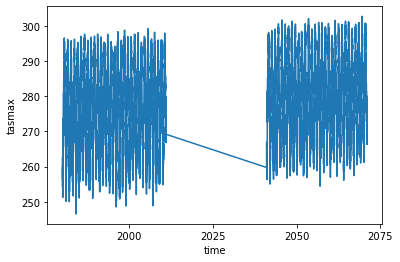

In [9]:
# 12:10
%time ds_mean.tasmax.plot()

In [11]:
tmean = ds_mean.tasmax.

In [10]:
# 12:10
%time ds_mean.tasmax.plot()

KeyboardInterrupt: 

In [61]:
tempMax

<xarray.Dataset>
Dimensions:       (lat: 700, lon: 1064, time: 365, ts: 3)
Coordinates:
  * ts            (ts) float32 nan nan nan
  * time          (time) datetime64[ns] 2050-01-01 2050-01-02 ... 2050-12-31
  * lat           (lat) float32 83.28931 83.20598 83.12265 ... 25.12497 25.04164
  * lon           (lon) float32 -141.04314 -140.9598 ... -52.54667 -52.46334
Data variables:
    time_vectors  (time, ts) int32 2050 1 1 2050 1 2 ... 2050 12 30 2050 12 31
    tasmax        (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
Attributes:
    Conventions:     CF-1.5
    title:           IPSL-CM5A-LR model output prepared for CMIP5 historical
    history:         2011-01-17T22:12:23Z CMOR rewrote data to comply with CF...
    institution:     IPSL (Institut Pierre Simon Laplace, Paris, France)
    source:          IPSL-CM5A-LR (2010) : atmos : LMDZ4 (LMDZ4_v5, 96x95x39)...
    redistribution:  Redistribution prohibited. For internal use only.

In [52]:
%time df = tempMax.to_dataframe().dropna()
df

CPU times: user 1min 42s, sys: 36.6 s, total: 2min 19s
Wall time: 37.8 s


time_vectors      tasmax
lat       lon        time       ts                           
66.623306 -89.045212 2050-01-01 NaN          2050  248.986389
                                NaN             1  248.986389
                                NaN             1  248.986389
                     2050-01-02 NaN          2050  260.519012
                                NaN             1  260.519012
...                                           ...         ...
40.041039 -74.045807 2050-12-30 NaN            12  288.435303
                                NaN            30  288.435303
                     2050-12-31 NaN          2050  278.501404
                                NaN            12  278.501404
                                NaN            31  278.501404

[83445570 rows x 2 columns]

In [60]:
%time df.reset_index().to_feather("test.feather")

CPU times: user 50.9 s, sys: 9.96 s, total: 1min
Wall time: 5.92 s
